In [2]:
!pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 57.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
!pip install numpy==1.26.0
!pip install scipy==1.11.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 23.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This be

In [4]:
!pip install statsmodels==0.13.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 26.5 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.4
    Uninstalling statsmodels-0.14.4:
      Successfully uninstalled statsmodels-0.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.5 requires statsmodels>=0.14.0, but you have statsmodels 0.13.5 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # charts plotting
import plotly.graph_objects as go # more customized plotting
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
pd.set_option("display.max_columns", None)


# Data Visualization
from plotnine import *

# Modeling
from sklearn.preprocessing import LabelEncoder
from pygam import GAM, ExpectileGAM, s, l, f
import statsmodels.api as sm

In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/Spinmaster/train_data.csv')
df_train.rename(columns={'Customer ID': 'CustomerID', "Total":"Revenue"}, inplace=True)
df_train['CustomerID'] = df_train['CustomerID'].astype(int)
df_train['InvoiceDate'] = pd.to_datetime(df_train['InvoiceDate'])
df_train['InvoiceDayOfWeek'] = df_train['InvoiceDate'].dt.dayofweek
df_train['InvoiceMonth'] = df_train['InvoiceDate'].dt.month
df_train['InvoiceYear'] = df_train['InvoiceDate'].dt.year
df_train['InvoiceDay'] = df_train['InvoiceDate'].dt.day
print(df_train.shape)
df_train.sample(5)

(15503, 14)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID,Revenue,InvoiceDayOfWeek,InvoiceMonth,InvoiceYear,InvoiceDay
3031,543040,21137,BLACK RECORD COVER FRAME,2,2011-02-02 17:06:00,3.75,17337,United Kingdom,17337,7.50,2,2,2011,2
9380,556284,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12,2011-06-10 08:54:00,2.95,17115,United Kingdom,17115,35.40,4,6,2011,10
10809,559338,23298,SPOTTY BUNTING,7,2011-07-07 16:30:00,10.79,-999,United Kingdom,99999,75.53,3,7,2011,7
1348,539039,84879,ASSORTED COLOUR BIRD ORNAMENT,40,2010-12-15 15:00:00,1.69,13124,United Kingdom,13124,67.60,2,12,2010,15
11280,560240,23298,SPOTTY BUNTING,3,2011-07-17 11:59:00,4.95,15716,United Kingdom,15716,14.85,6,7,2011,17


In [3]:
df_train['StockCode'].value_counts()

,count
StockCode,
85123A,1753
85099B,1531
22423,1487
47566,1426
84879,1026
22386,947
22197,910
22469,906
23298,835


In [4]:
top5_descriptions = df_train.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(5).reset_index()

fig = px.bar(top5_descriptions, x='Description', y='Revenue', title='Top 5 Products by Revenue',
             labels={'Revenue': 'Revenue', 'Description': 'Product Description'})
fig.update_xaxes(tickangle=45)  # Rotate x-axis labels for better readability

# Add data labels on top of each bar
fig.update_traces(texttemplate='%{y:.2f}', textposition='inside')

fig.show()

In [5]:
top5_descriptions

,Description,Revenue
0,DOTCOM POSTAGE,131512.26
1,REGENCY CAKESTAND 3 TIER,111298.05
2,PARTY BUNTING,84095.76
3,WHITE HANGING HEART T-LIGHT HOLDER,73802.89
4,JUMBO BAG RED RETROSPOT,63214.94


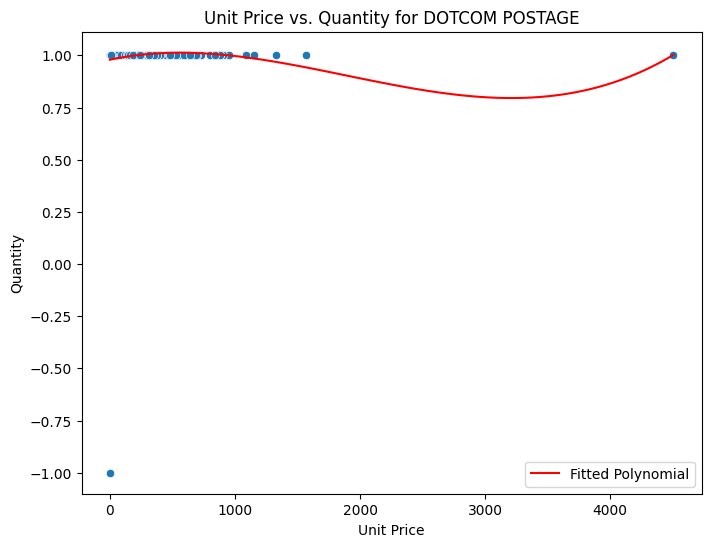

In [ ]:
desc = df_train[df_train['Description'] == 'DOTCOM POSTAGE']
# Assuming 'desc' DataFrame is already defined as in the previous code
x = desc['UnitPrice']
y = desc['Quantity']

# Fit a polynomial of degree 2 (you can adjust the degree)
coefficients = np.polyfit(x, y, 3)
polynomial = np.poly1d(coefficients)

# Generate x values for the fitted curve
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = polynomial(x_fit)


plt.figure(figsize=(8, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=desc)
plt.plot(x_fit, y_fit, color='red', label='Fitted Polynomial') # Plot the fitted polynomial

plt.title('Unit Price vs. Quantity for DOTCOM POSTAGE')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.legend() # Show the legend
plt.show()

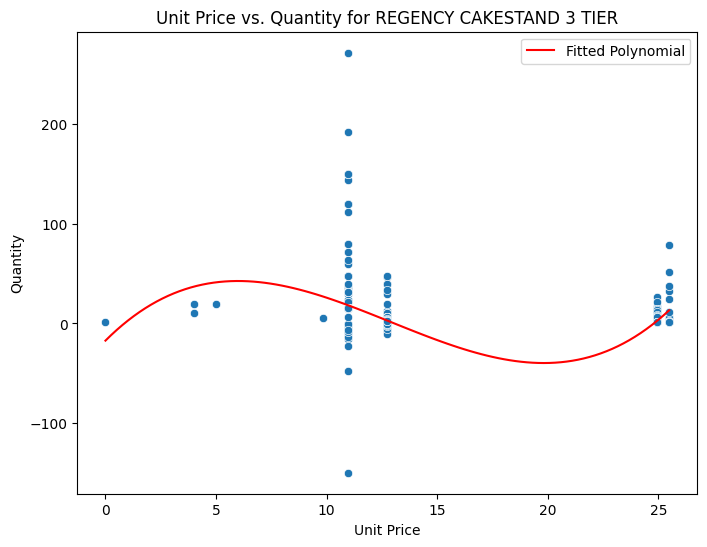

In [ ]:
desc = df_train[df_train['Description'] == 'REGENCY CAKESTAND 3 TIER']
# Assuming 'desc' DataFrame is already defined as in the previous code
x = desc['UnitPrice']
y = desc['Quantity']

# Fit a polynomial of degree 2 (you can adjust the degree)
coefficients = np.polyfit(x, y, 3)
polynomial = np.poly1d(coefficients)

# Generate x values for the fitted curve
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = polynomial(x_fit)


plt.figure(figsize=(8, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=desc)
plt.plot(x_fit, y_fit, color='red', label='Fitted Polynomial') # Plot the fitted polynomial

plt.title('Unit Price vs. Quantity for REGENCY CAKESTAND 3 TIER')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.legend() # Show the legend
plt.show()


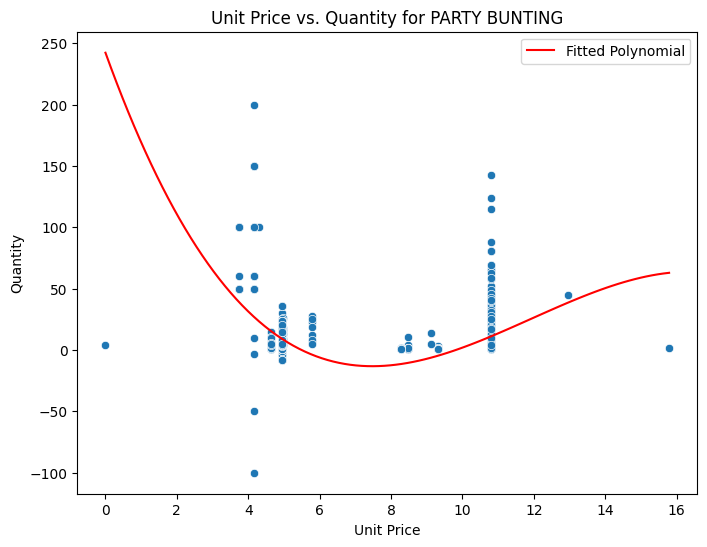

In [ ]:
desc = df_train[df_train['Description'] == 'PARTY BUNTING']
# Assuming 'desc' DataFrame is already defined as in the previous code
x = desc['UnitPrice']
y = desc['Quantity']

# Fit a polynomial of degree 2 (you can adjust the degree)
coefficients = np.polyfit(x, y, 3)
polynomial = np.poly1d(coefficients)

# Generate x values for the fitted curve
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = polynomial(x_fit)


plt.figure(figsize=(8, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=desc)
plt.plot(x_fit, y_fit, color='red', label='Fitted Polynomial') # Plot the fitted polynomial

plt.title('Unit Price vs. Quantity for PARTY BUNTING')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.legend() # Show the legend
plt.show()

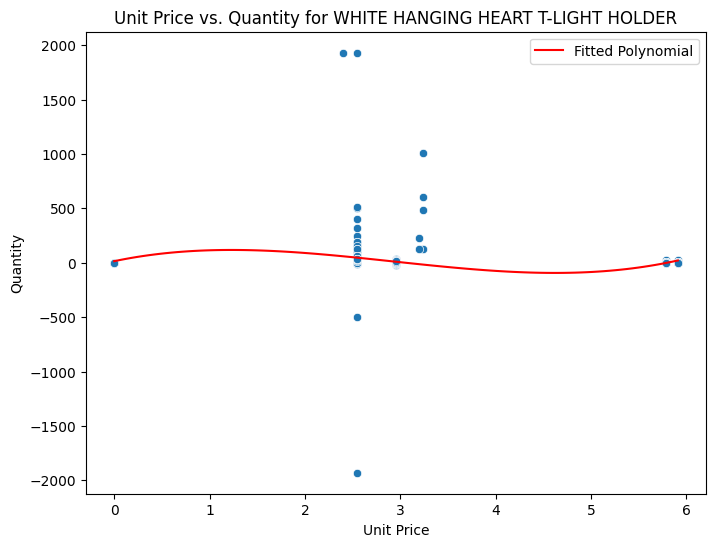

In [ ]:
desc = df_train[df_train['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER']
# Assuming 'desc' DataFrame is already defined as in the previous code
x = desc['UnitPrice']
y = desc['Quantity']

# Fit a polynomial of degree 2 (you can adjust the degree)
coefficients = np.polyfit(x, y, 3)
polynomial = np.poly1d(coefficients)

# Generate x values for the fitted curve
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = polynomial(x_fit)


plt.figure(figsize=(8, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=desc)
plt.plot(x_fit, y_fit, color='red', label='Fitted Polynomial') # Plot the fitted polynomial

plt.title('Unit Price vs. Quantity for WHITE HANGING HEART T-LIGHT HOLDER')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.legend() # Show the legend
plt.show()

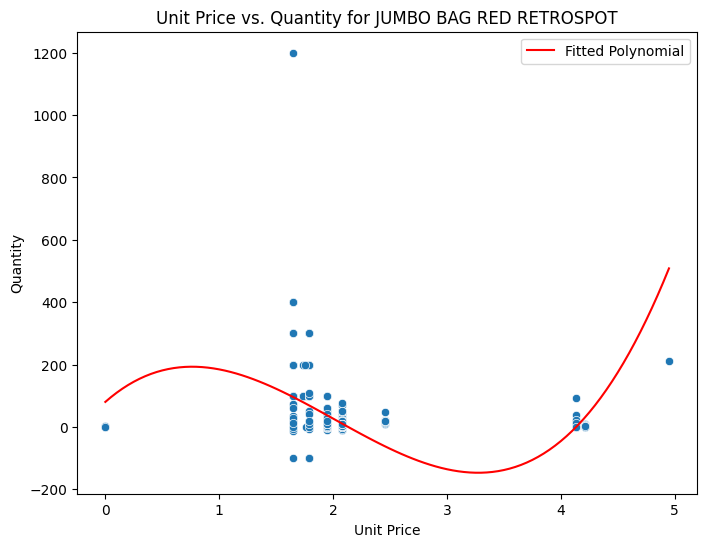

In [ ]:
desc = df_train[df_train['Description'] == 'JUMBO BAG RED RETROSPOT']
# Assuming 'desc' DataFrame is already defined as in the previous code
x = desc['UnitPrice']
y = desc['Quantity']

# Fit a polynomial of degree 2 (you can adjust the degree)
coefficients = np.polyfit(x, y, 3)
polynomial = np.poly1d(coefficients)

# Generate x values for the fitted curve
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = polynomial(x_fit)


plt.figure(figsize=(8, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=desc)
plt.plot(x_fit, y_fit, color='red', label='Fitted Polynomial') # Plot the fitted polynomial

plt.title('Unit Price vs. Quantity for JUMBO BAG RED RETROSPOT')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.legend() # Show the legend
plt.show()

In [11]:
top5_stockcodes = df_train.groupby('StockCode')['Revenue'].sum().sort_values(ascending=False).head(5).reset_index()
top5_stockcodes

,StockCode,Revenue
0,DOT,131512.26
1,22423,111298.05
2,47566,84095.76
3,85123A,73802.89
4,85099B,63214.94


In [14]:
df_pe = (
    df_train
    .groupby('StockCode')
    .agg({'UnitPrice': ['max', 'min'],
          'Quantity': ['max', 'min'],
          'StockCode':'count'})
    .reset_index()
    .pipe(lambda d: d.set_axis(['StockCode', 'price_max', 'price_min', 'qty_max', 'qty_min', 'obs_count'], axis=1))
    .assign(pct_change_price=lambda d: (d['price_max'] - d['price_min']) / d['price_min'] * 100,
            pct_change_qty  =lambda d: (d['qty_max'] - d['qty_min']) / d['qty_min'] * 100)
    .assign(
         ratio=lambda d: d['pct_change_qty'] / d['pct_change_price']) # demand elasticity
).sort_values('ratio')
# df_pe = df_pe[df_pe['StockCode'].isin(top5_stockcodes['StockCode'])]
# .dropna()
df_pe = df_pe[(df_pe['ratio']!=np.inf) & (df_pe['ratio']!=0)].sort_values('ratio')
df_pe

,StockCode,price_max,price_min,qty_max,qty_min,obs_count,pct_change_price,pct_change_qty,ratio
4,22197,2.46,0.72,4300,-14,910,241.666667,-30814.285714,-127.507389
15,82484,16.63,4.77,600,-12,518,248.637317,-5100.000000,-20.511804
5,22386,5.06,1.65,800,-20,947,206.666667,-4100.000000,-19.838710
9,22910,6.77,2.55,320,-18,302,165.490196,-1877.777778,-11.346761
1,22086,6.77,2.55,320,-40,431,165.490196,-900.000000,-5.438389
3,22178,2.95,1.06,288,-144,815,178.301887,-300.000000,-1.682540


In [ ]:
df_train_t5 = df_train[df_train['Description'].isin(top5_descriptions['Description'].tolist())]
print(df_train_t5.shape)
df_train_t5.sample(5)

(6795, 14)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID,Revenue,InvoiceDayOfWeek,InvoiceMonth,InvoiceYear,InvoiceDay
592,537484,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-07 11:30:00,2.55,14733,United Kingdom,14733,81.60,1,12,2010,7
1881,540349,85099B,JUMBO BAG RED RETROSPOT,10,2011-01-06 14:07:00,1.95,15379,United Kingdom,15379,19.50,3,1,2011,6
13194,564311,85099B,JUMBO BAG RED RETROSPOT,200,2011-08-24 12:52:00,1.79,15769,United Kingdom,15769,358.00,2,8,2011,24
11679,560996,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3,2011-07-22 13:53:00,2.95,17625,United Kingdom,17625,8.85,4,7,2011,22
6220,550496,85099B,JUMBO BAG RED RETROSPOT,4,2011-04-18 15:05:00,4.13,-999,United Kingdom,99999,16.52,0,4,2011,18


In [ ]:
df_train_t5a = pd.get_dummies(df_train_t5, columns=['StockCode'], prefix='StockCode', dtype=int)
df_train_t5a['IsWeekend'] = df_train_t5a['InvoiceDayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
print(df_train_t5a.shape)
df_train_t5a.sample(5)

(6795, 19)


,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID,Revenue,InvoiceDayOfWeek,InvoiceMonth,InvoiceYear,InvoiceDay,StockCode_22423,StockCode_47566,StockCode_85099B,StockCode_85123A,StockCode_DOT,IsWeekend
12619,562933,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-08-10 16:51:00,5.79,-999,United Kingdom,99999,11.58,2,8,2011,10,0,0,0,1,0,0
6827,551976,REGENCY CAKESTAND 3 TIER,24,2011-05-05 13:29:00,10.95,15061,United Kingdom,15061,262.80,3,5,2011,5,1,0,0,0,0,0
2367,541506,JUMBO BAG RED RETROSPOT,4,2011-01-18 16:05:00,4.13,-999,United Kingdom,99999,16.52,1,1,2011,18,0,0,1,0,0,0
11474,560580,REGENCY CAKESTAND 3 TIER,22,2011-07-19 15:23:00,10.95,14088,United Kingdom,14088,240.90,1,7,2011,19,1,0,0,0,0,0
2802,542603,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-01-30 12:09:00,2.55,16985,United Kingdom,16985,81.60,6,1,2011,30,0,0,0,1,0,1


In [ ]:
id_cols = ["InvoiceDate", "Description"]
num_col = ["UnitPrice"]
cat_col = ['StockCode_22423', 'StockCode_47566', 'StockCode_85099B', 'StockCode_85123A', 'StockCode_DOT', 'IsWeekend']
target_col = ["Quantity"]
X_train = df_train_t5a[num_col + cat_col]
y_train = df_train_t5a[target_col]

In [ ]:
X = sm.add_constant(X_train) # adding intercept
y = y_train

# Model Fit
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     16.76
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           2.67e-19
Time:                        06:46:45   Log-Likelihood:                -36712.
No. Observations:                6795   AIC:                         7.344e+04
Df Residuals:                    6788   BIC:                         7.349e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.3663      0.702  

In [ ]:
df_train_t5a.sample(5)

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID,Revenue,InvoiceDayOfWeek,InvoiceMonth,InvoiceYear,InvoiceDay,StockCode_22423,StockCode_47566,StockCode_85099B,StockCode_85123A,StockCode_DOT,IsWeekend
13555,565144,JUMBO BAG RED RETROSPOT,30,2011-09-01 13:50:00,2.08,16456,United Kingdom,16456,62.40,3,9,2011,1,0,0,1,0,0,0
2735,542360,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-01-27 12:40:00,2.95,14701,United Kingdom,14701,5.90,3,1,2011,27,0,0,0,1,0,0
14075,566286,JUMBO BAG RED RETROSPOT,10,2011-09-11 14:58:00,2.08,14057,United Kingdom,14057,20.80,6,9,2011,11,0,0,1,0,0,1
9499,556515,JUMBO BAG RED RETROSPOT,1,2011-06-13 10:45:00,4.13,-999,United Kingdom,99999,4.13,0,6,2011,13,0,0,1,0,0,0
5649,549187,REGENCY CAKESTAND 3 TIER,16,2011-04-07 10:09:00,10.95,16144,United Kingdom,16144,175.20,3,4,2011,7,1,0,0,0,0,0


In [ ]:
unique_prod

array(['85123A', '85099B', '22423', 'DOT', '47566'], dtype=object)

In [ ]:
all_gam_results = pd.DataFrame()
unique_prod = df_train_t5['StockCode'].unique()
for product in unique_prod:
    # Filter for current product
    # Use .loc accessor for indexing and filtering to avoid potential ambiguity
    product_data = df_train_t5.loc[df_train_t5['StockCode'] == product]

    # Predictors & target split
    X = product_data[['UnitPrice']]
    y = product_data['Quantity']

    # List of quantiles for modeling
    quantiles = [0.025, 0.5, 0.975]
    gam_results = {}

    # Fit the GAM model
    for q in quantiles:
        gam = ExpectileGAM(s(0), expectile=q) # instance the model
        gam.fit(X,y) #fit
        gam_results[f'pred_{q}'] = gam.predict(X) #predict for that quantile

    # Store the results in a DF
    predictions_gam = pd.DataFrame(gam_results).set_index(X.index)

    # Concatenate results column-wise with the original data
    # Ensure 'price' and 'Product' columns are actually present in your DataFrame
    predictions_gam_df = pd.concat([product_data[['UnitPrice', 'StockCode','Quantity']], predictions_gam], axis=1)

    # Concatenate results row-wise
    all_gam_results = pd.concat([all_gam_results, predictions_gam_df], axis=0)

In [ ]:
all_gam_results

,UnitPrice,StockCode,Quantity,pred_0.025,pred_0.5,pred_0.975
0,2.55,85123A,6,-197.230699,50.234335,384.374952
3,2.55,85123A,6,-197.230699,50.234335,384.374952
5,2.55,85123A,6,-197.230699,50.234335,384.374952
15,2.55,85123A,64,-197.230699,50.234335,384.374952
19,2.55,85123A,32,-197.230699,50.234335,384.374952
...,...,...,...,...,...,...
15434,4.95,47566,4,1.451935,5.644078,22.381799
15454,4.95,47566,5,1.451935,5.644078,22.381799
15458,4.95,47566,8,1.451935,5.644078,22.381799
15471,4.95,47566,4,1.451935,5.644078,22.381799


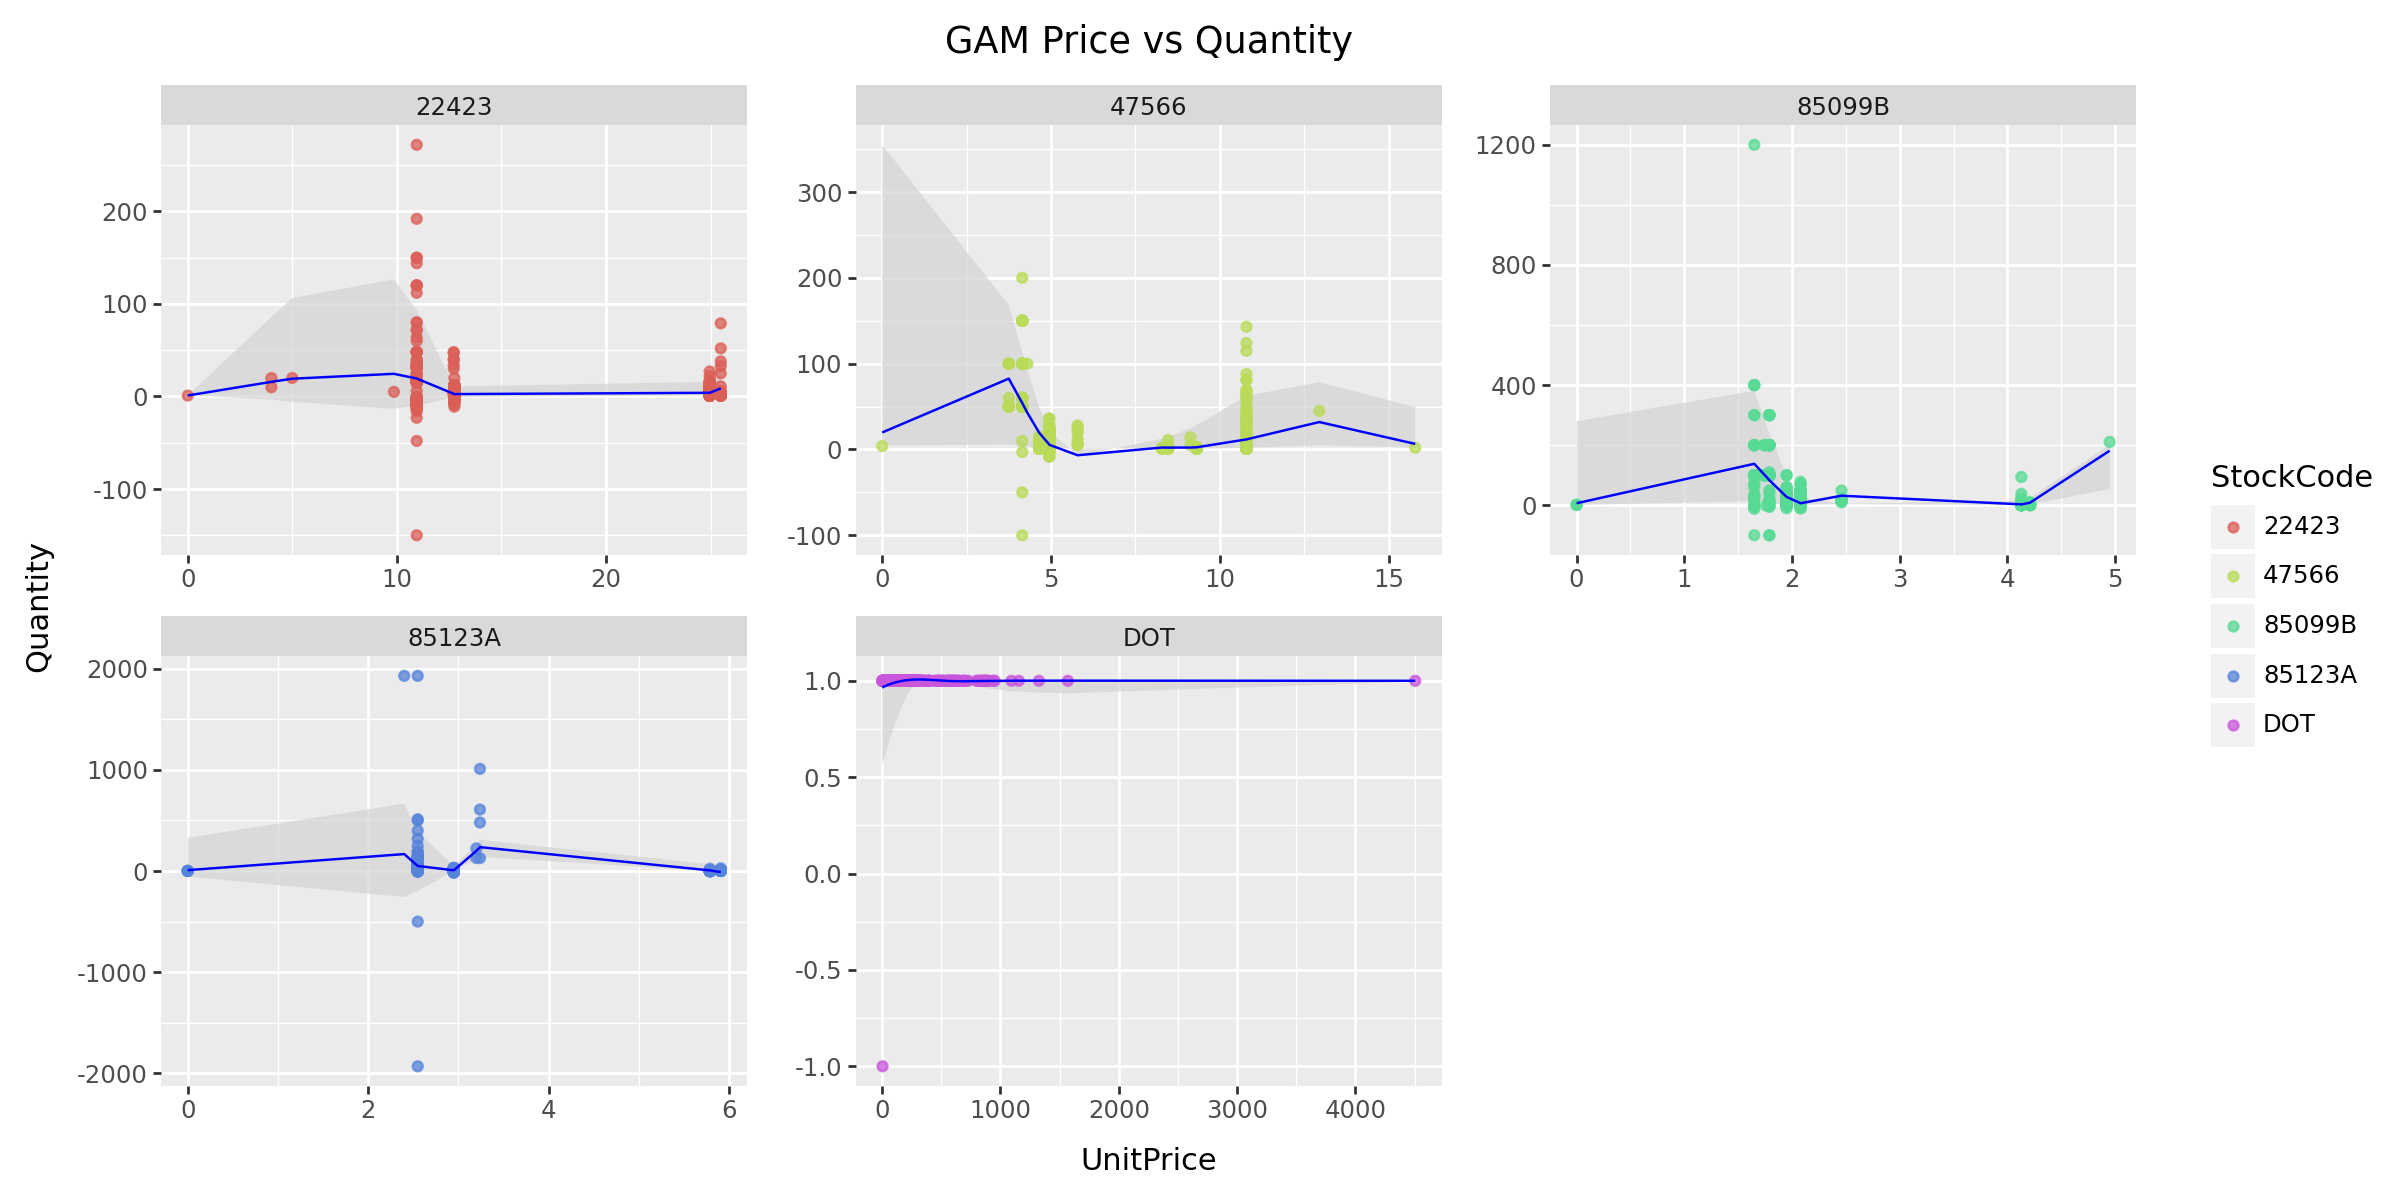

In [ ]:
(ggplot(
    data = all_gam_results,
    mapping = aes(x='UnitPrice', y='Quantity', color='StockCode', group= 'StockCode') ) +
    geom_ribbon(aes(ymax= 'pred_0.975', ymin= 'pred_0.025'),
                fill='#d3d3d3', color= '#FF000000', alpha=0.7, show_legend=False) +
    geom_point(alpha=0.75) +
    geom_line(aes(y='pred_0.5'), color='blue') +
    facet_wrap('StockCode', scales='free') +
    labs(title='GAM Price vs Quantity') +
    theme(figure_size=(12,6))
)

In [ ]:
for col in all_gam_results.columns:
    if col.startswith('pred'):
        all_gam_results['revenue_' + col] = all_gam_results['UnitPrice'] * all_gam_results[col]

# Actual revenue
all_gam_results['revenue_actual'] = all_gam_results['UnitPrice'] * all_gam_results['Quantity']

# View
all_gam_results.sample(2)

,UnitPrice,StockCode,Quantity,pred_0.025,pred_0.5,pred_0.975,revenue_pred_0.025,revenue_pred_0.5,revenue_pred_0.975,revenue_actual
3017,2.95,85123A,12,1.116194,7.373863,51.961602,3.292771,21.752895,153.286726,35.40
5388,4.13,85099B,1,0.607421,2.958240,15.268805,2.508649,12.217531,63.060163,4.13


In [ ]:
best_50 = (
    all_gam_results
    .groupby('StockCode')
    .apply(lambda x: x[x['revenue_pred_0.5'] == x['revenue_pred_0.5'].max()].head(1))
    .reset_index(level=0, drop=True)
)

# Calculating where the predicted 97.5% percentile revenue is the max
best_975 = (
    all_gam_results
    .groupby('StockCode')
    .apply(lambda x: x[x['revenue_pred_0.975'] == x['revenue_pred_0.975'].max()].head(1))
    .reset_index(level=0, drop=True)
)

# Calculating where the predicted 2.5% percentile revenue is the max
best_025 = (
    all_gam_results
    .groupby('StockCode')
    .apply(lambda x: x[x['revenue_pred_0.025'] == x['revenue_pred_0.025'].max()].head(1))
    .reset_index(level=0, drop=True)
)

<ipython-input-25-fdc2b20b42a9>:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

<ipython-input-25-fdc2b20b42a9>:12: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

<ipython-input-25-fdc2b20b42a9>:20: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass 

In [ ]:
best_50

,UnitPrice,StockCode,Quantity,pred_0.025,pred_0.5,pred_0.975,revenue_pred_0.025,revenue_pred_0.5,revenue_pred_0.975,revenue_actual
5397,9.86,22423,5,-13.226998,24.503782,126.637699,-130.418198,241.607294,1248.647715,49.30
5287,12.95,47566,45,4.955091,31.963721,78.305700,64.168432,413.930189,1014.058810,582.75
5286,4.95,85099B,211,54.127760,181.580397,201.270360,267.932412,898.822965,996.288280,1044.45
2048,3.24,85123A,1010,138.994724,236.351734,308.423923,450.342905,765.779618,999.293511,3272.40
12641,4505.17,DOT,1,0.995488,0.999993,0.999999,4484.842457,4505.139695,4505.167561,4505.17


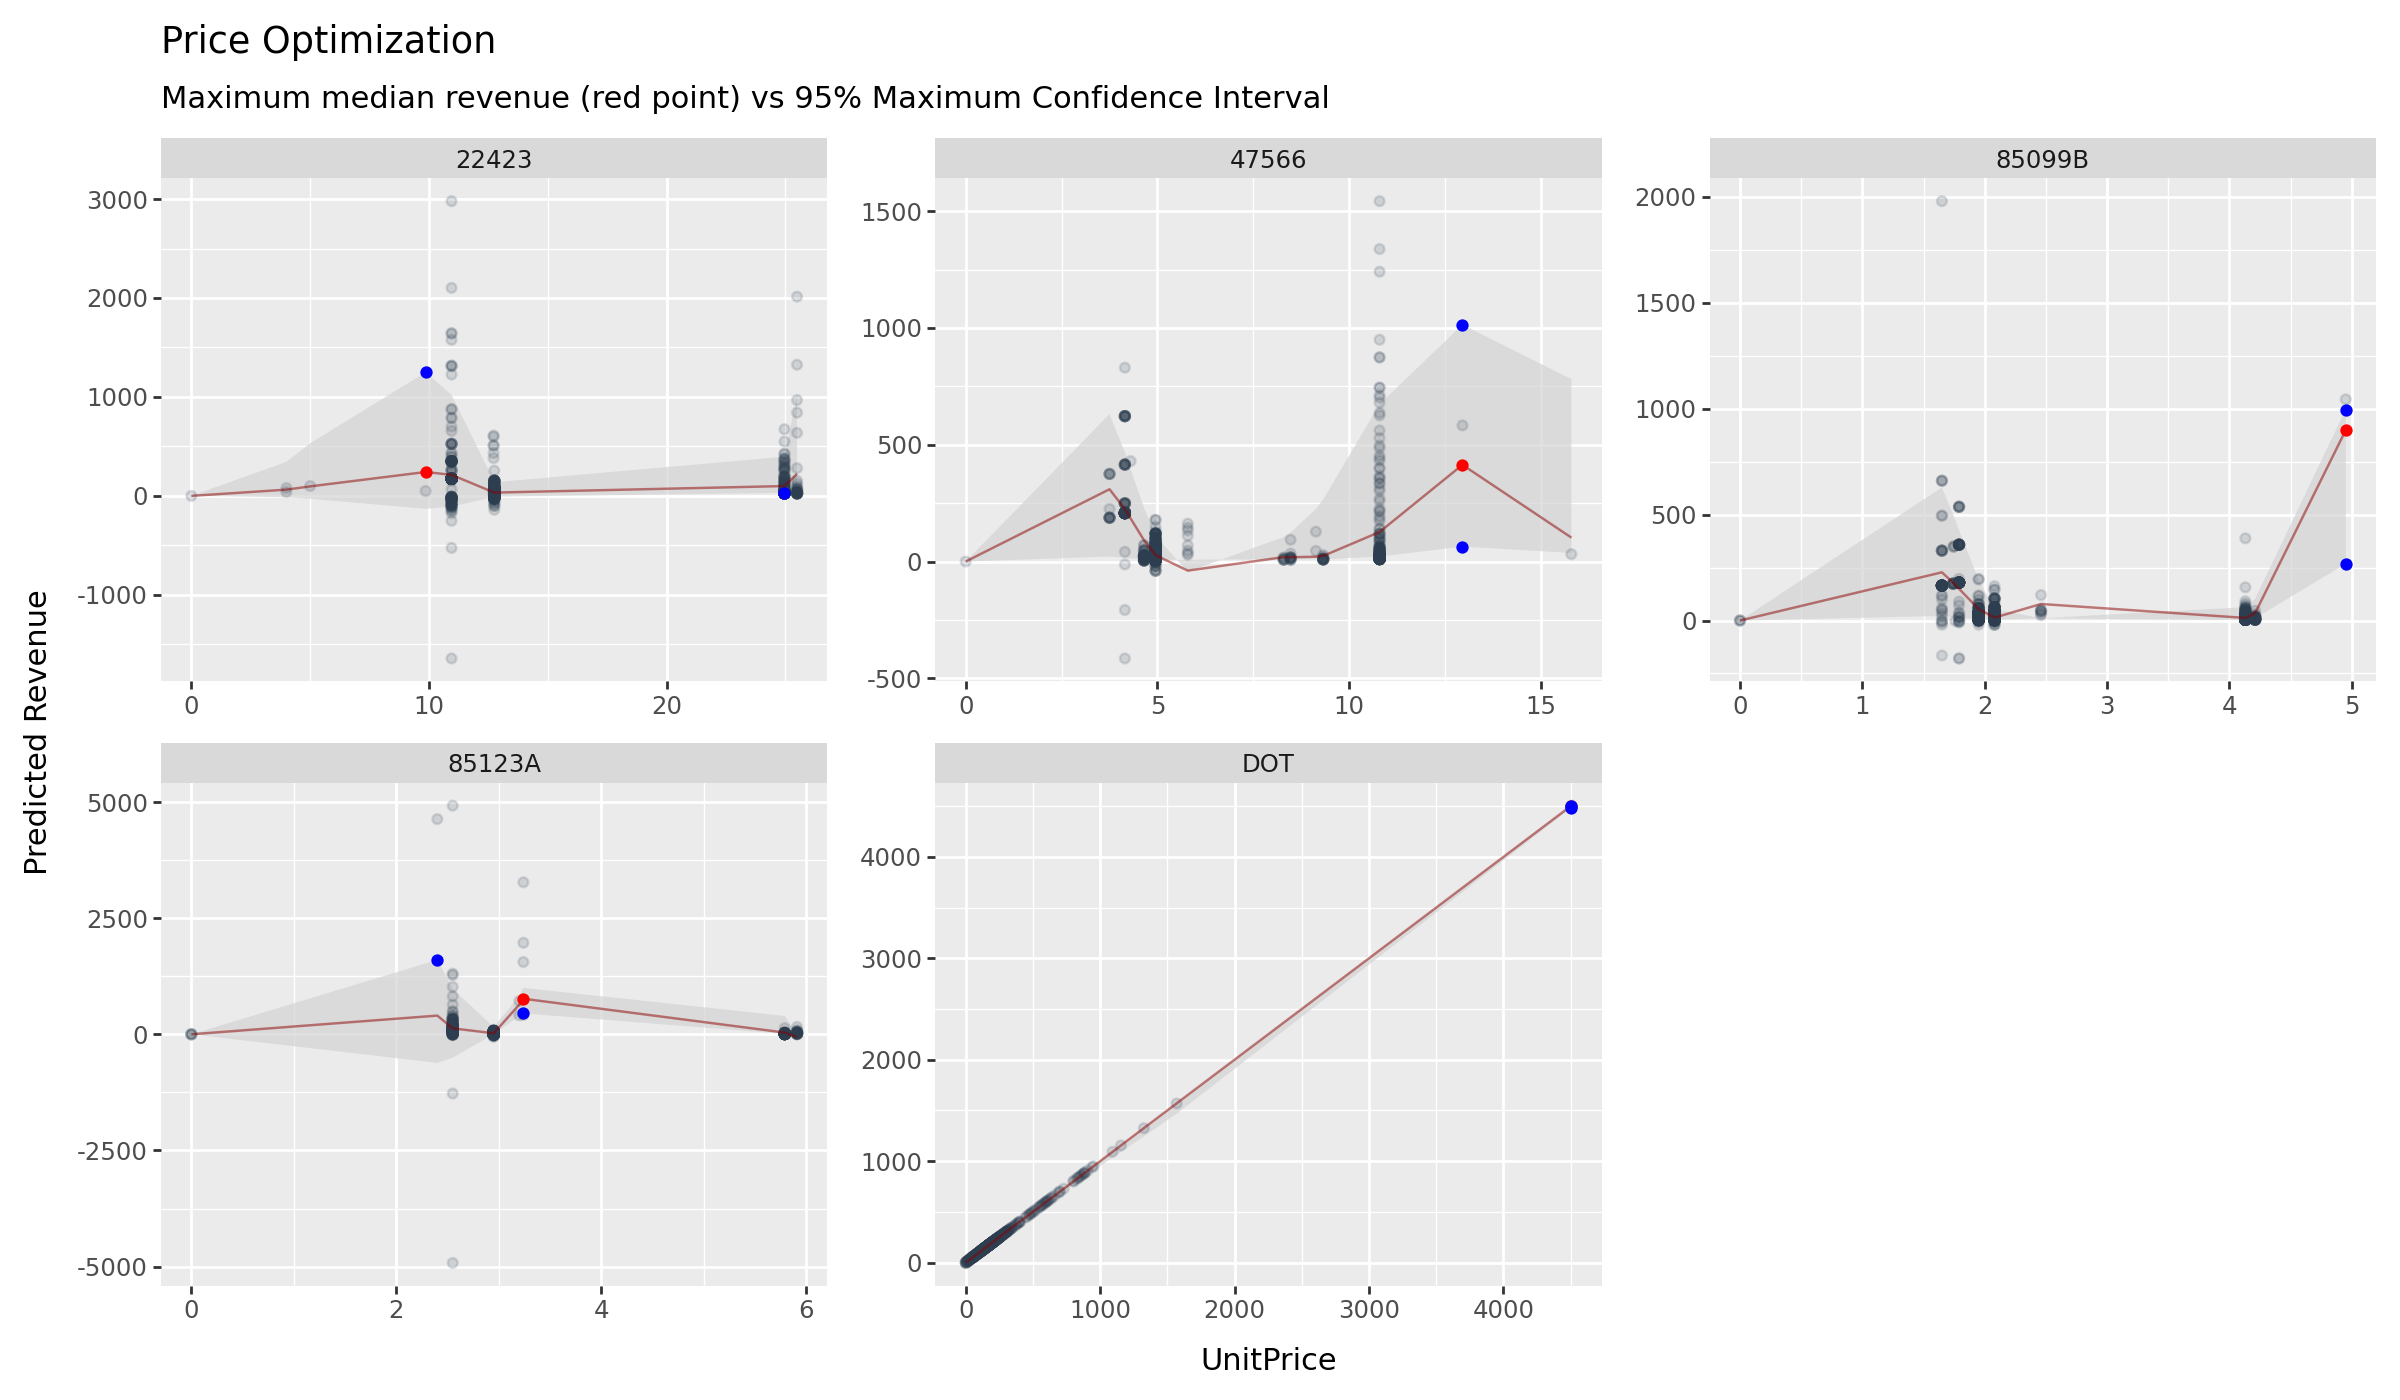

In [ ]:
(ggplot(
    # Data
    data = all_gam_results,
    # Axes
    mapping = aes(x='UnitPrice', y='revenue_pred_0.5', color='StockCode', group='StockCode') ) +
# Adding the Band
geom_ribbon(aes(ymax= 'revenue_pred_0.975', ymin= 'revenue_pred_0.025'),
                fill='#d3d3d3', color= '#FF000000', alpha=0.7, show_legend=False) +
# Adding the points
geom_point(aes(y='revenue_actual'), alpha=0.15, color="#2C3E50") +
# Adding 50th percentile line
geom_line(aes(y='revenue_pred_0.5'), alpha=0.5, color='darkred') +
# Addimg the 50th pct points
geom_point(data=best_50, color='red') +
# Addimg the 97th pct points
geom_point(data=best_975, mapping= aes(y='revenue_pred_0.975'), color='blue') +
# Addimg the 2.5th pct points
geom_point(data=best_025, mapping= aes(y='revenue_pred_0.025'), color='blue') +
# Wraps by product
facet_wrap('StockCode', scales='free') +
# Labels
labs(
    title='Price Optimization',
    subtitle='Maximum median revenue (red point) vs 95% Maximum Confidence Interval',
    x= 'UnitPrice',
    y= 'Predicted Revenue'
    ) +
theme(figure_size=(12,7))

)